```{eval-rst}
.. currentmodule:: rt1_model
```

# Number of expansion coefficients

When you use the rt1 python module to calculate **first-order corrections** with respect to a given set of scattering distribution functions,
it is important to realize that the used method (e.g. a series-expansion in Legendre polynomials) has some limitations (especially for very directional distributions), namely:

- using **too less expansion coefficients** for a directional scattering distribution can lead to **wrong estimates**
- using a **very high number of expansion coefficients** (>20) will slow down calculations and can result in **numerical precision errors**

To visualize the impact of the number of coefficients on the interaction-contribution, the following example uses a {py:class}`surface.HenyeyGreenstein` and a {py:class}`volume.HenyeyGreenstein` scattering distribution with 

- different asymmetry-parameters for volume (`t_v`) and surface (`t_s`) scattering distributions
- different numbers of expansion-coefficients (`ncoefs`)

In [2]:
%matplotlib widget
from rt1_model import surface, volume, RT1
import matplotlib.pyplot as plt
import numpy as np

inc = np.deg2rad(np.linspace(30, 60, 100))
omega=0.3 
tau=0.6
NormBRDF=0.3

def eval_int(t_v, t_s, ncoefs):
    print(f"Evaluating t_v={t_v} and t_s={t_s} with ncoefs={ncoefs}")
    
    V = volume.HenyeyGreenstein(t=t_v, ncoefs=ncoefs)
    SRF = surface.HenyeyGreenstein(t=t_s, ncoefs=ncoefs)
    
    R = RT1(V, SRF, dB=True)
    R.set_monostatic(p_0=0)
    R.set_geometry(t_0=inc)
    contrib = R.interaction(omega=omega, tau=tau, NormBRDF=NormBRDF)
    return contrib

res = dict()
for t_v in [0.4, 0.6, 0.8]:
    res[t_v] = dict()
    for t_s in [0.4, 0.6, 0.8]:
        res[t_v][t_s] = dict()
        for ncoefs in [4, 10, 15, 20, 25]:
            res[t_v][t_s][ncoefs] = eval_int(t_v, t_s, ncoefs)

Evaluating t_v=0.4 and t_s=0.4 with ncoefs=4
Evaluating t_v=0.4 and t_s=0.4 with ncoefs=10
Evaluating t_v=0.4 and t_s=0.4 with ncoefs=15
Evaluating t_v=0.4 and t_s=0.4 with ncoefs=20
Evaluating t_v=0.4 and t_s=0.4 with ncoefs=25
Evaluating t_v=0.4 and t_s=0.6 with ncoefs=4
Evaluating t_v=0.4 and t_s=0.6 with ncoefs=10
Evaluating t_v=0.4 and t_s=0.6 with ncoefs=15
Evaluating t_v=0.4 and t_s=0.6 with ncoefs=20
Evaluating t_v=0.4 and t_s=0.6 with ncoefs=25
Evaluating t_v=0.4 and t_s=0.8 with ncoefs=4
Evaluating t_v=0.4 and t_s=0.8 with ncoefs=10
Evaluating t_v=0.4 and t_s=0.8 with ncoefs=15
Evaluating t_v=0.4 and t_s=0.8 with ncoefs=20
Evaluating t_v=0.4 and t_s=0.8 with ncoefs=25
Evaluating t_v=0.6 and t_s=0.4 with ncoefs=4
Evaluating t_v=0.6 and t_s=0.4 with ncoefs=10
Evaluating t_v=0.6 and t_s=0.4 with ncoefs=15
Evaluating t_v=0.6 and t_s=0.4 with ncoefs=20
Evaluating t_v=0.6 and t_s=0.4 with ncoefs=25
Evaluating t_v=0.6 and t_s=0.6 with ncoefs=4
Evaluating t_v=0.6 and t_s=0.6 with nco

D:\python_modules\RT1_new\src\rt1_model\_calc.py:720: RuntimeWarning: invalid value encountered in log10
  ret = 10.0 * np.log10(ret)


Evaluating t_v=0.8 and t_s=0.8 with ncoefs=20
Evaluating t_v=0.8 and t_s=0.8 with ncoefs=25


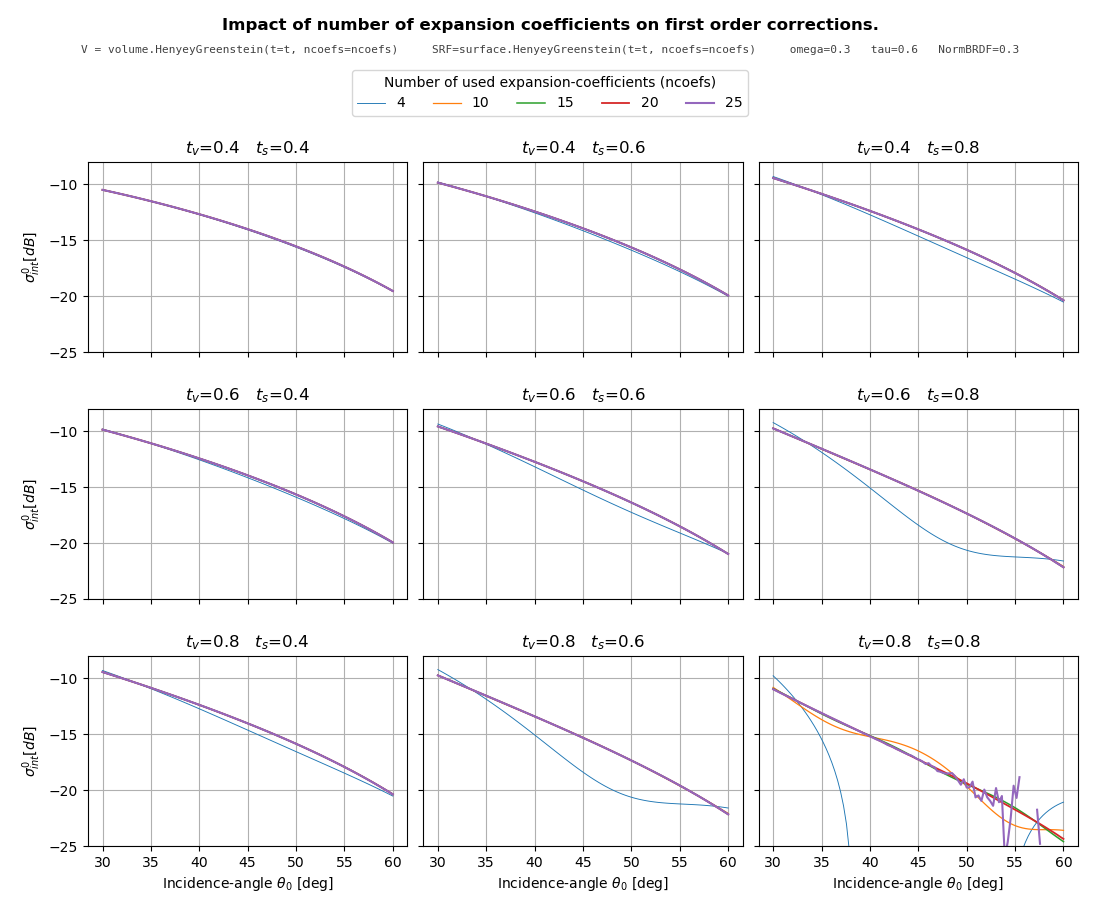

In [3]:
f, axes = plt.subplots(len(res), len(res), figsize=(11, 9), sharey=True, sharex=True)
f.canvas.header_visible = False
f.suptitle(f"Impact of number of expansion coefficients on first order corrections.", weight="bold")
f.text(0.5, .95, 
       "V = volume.HenyeyGreenstein(t=t, ncoefs=ncoefs)     SRF=surface.HenyeyGreenstein(t=t, ncoefs=ncoefs)     "
       f"omega={omega}   tau={tau}   NormBRDF={NormBRDF}",
       va="top", ha="center", family="monospace", c="0.25", size=8)

for ax in axes[:,0]:
    ax.set_ylabel(r"$\sigma^0_{int} [dB]$")
for ax in axes[-1,:]:
    ax.set_xlabel(r"Incidence-angle $\theta_0$ [deg]")

for i, t_v in enumerate(res):
    for j, t_s in enumerate(res[t_v]):
        ax = axes[i][j]
        ax.set_title(f"$t_v$={t_v}   $t_s$={t_s}")
        ax.grid()
        max_ncoefs = max(res[t_v][t_s])
        for ncoefs, contrib in res[t_v][t_s].items():
            
            ax.plot(np.rad2deg(inc), contrib, label=ncoefs, lw=.5+ncoefs/max_ncoefs)
            ax.set_ylim(-25, -8)

leg = f.legend(*ax.get_legend_handles_labels(), title="Number of used expansion-coefficients (ncoefs)", ncol=10, loc="upper center", bbox_to_anchor=(0.5, .93))
f.subplots_adjust(left=0.08, right=0.98, top=0.82, bottom=0.06, wspace=0.05, hspace=0.3)

The above image shows reveals the following important considerations:


:::{note}
- For **low directionalities** (t=0.4) a **low number of coefficients is sufficient** and no precision errors occur.
- For **high directionalities** (t > 0.4) a **minimum number of coefficients is required** to properly estimate the interaction contribution.**  
  This is especially **crucial for very high directionalities** (t>.7)!
:::
:::{warning}
For **very high directionalities** and **very high number of coefficients** (t>0.7 and ncoefs>20) **numerical precision errors** might occur!
:::